In [99]:
!pip3 install wordcloud
!pip3 install gensim
!pip3 install nltk
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install wordcloud
!pip3 install tensorflow 2.x
!pip install tf-nightly

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, GlobalMaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import pathlib

In [2]:
stock_df = pd.read_csv("stock_sentiment.csv")

In [4]:
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
nltk.download("stopwords")
nltk.download("twitter_samples")

[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/alex/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [6]:
# check for null values
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def clean_text(message):
    remove_punc = [char for char in message if char not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    #remove_punc = remove_punc.lower()

    return remove_punc

In [5]:
stock_df["no punc"] = stock_df["Text"].apply(clean_text)

In [6]:
stock_df

,Text,Sentiment,no punc
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [7]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['http', 'https', 'from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

In [9]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [10]:
stock_df['cleaned'] = stock_df['no punc'].apply(preprocess)

In [11]:
stock_df['cleaned'] = stock_df['cleaned'].apply(lambda x: " ".join(x)) 

In [12]:
stock_df

,Text,Sentiment,no punc,cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,mnta
4,OI Over 21.37,1,OI Over 2137,
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,sharemarket live sensex high points nifty test...


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['cleaned'] ]
max_length = max(tweets_length)

In [15]:
stock_df

,Text,Sentiment,no punc,cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,mnta
4,OI Over 21.37,1,OI Over 2137,
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,sharemarket live sensex high points nifty test...


In [16]:
def build_word_dict(texts):
    
    dit = {'__PAD__': 0, '__UNK__': 1} 
    for sentence in texts: 
        for word in nltk.word_tokenize(sentence):
            if word not in dit: 
                dit[word] = len(dit)
    return dit    

In [17]:
word_dict = build_word_dict(stock_df['cleaned'])

In [18]:
total_words = len(word_dict.keys())
total_words

9273

In [19]:
x_train, x_test, y_train, y_test = train_test_split(stock_df['cleaned'], stock_df['Sentiment'], test_size = 0.15)

In [20]:
x_train.shape

(4922,)

In [21]:
x_test.shape

(869,)

In [22]:
x_train

4232                          ocz trying find bottom like
5583    india grow fastest among economies amid corona...
5275    global markets rise following fresh signals lo...
4561    added long fti strong weak tap strong shortter...
1288    goog min dot alert subscibers made hge signal ...
                              ...                        
4360                   added cat betting doesnt quite hit
2895                            daily triangle heopdating
2718    gae selling daytrade swing trades played break...
3803                    petm short hit tgt took final tgt
3012    jpm last days saw distribution may yet test dm...
Name: cleaned, Length: 4922, dtype: object

In [23]:
word_dict_train = build_word_dict(x_train)
print(len(word_dict_train))

8380


In [24]:
def sentence_to_vector(sentences, vocab_dict, max_length, unk_token='__UNK__'):
    
    sequences = []
    unk_ID = vocab_dict[unk_token]
    for sentence in sentences:
        word_l = nltk.word_tokenize(sentence)
        vector_word = []
        for word in word_l:
            word_ID = vocab_dict.get(word, unk_ID)
            vector_word.append(word_ID)
        vector_word.extend([0] * (max_length - len(vector_word)))
        sequences.append(vector_word)
    return sequences

In [25]:
train_sequences = np.array(sentence_to_vector(x_train, word_dict_train, max_length))
train_sequences

array([[   2,    3,    4, ...,    0,    0,    0],
       [   7,    8,    9, ...,    0,    0,    0],
       [  18,   19,   20, ...,    0,    0,    0],
       ...,
       [1334,  144, 6331, ...,    0,    0,    0],
       [2361,  121,  306, ...,    0,    0,    0],
       [ 364,   90, 1317, ...,    0,    0,    0]])

In [26]:
test_sequences = np.array(sentence_to_vector(x_test, word_dict_train, max_length))
test_sequences

array([[   1, 1513,    0, ...,    0,    0,    0],
       [ 295,  519,  642, ...,    0,    0,    0],
       [2596,  434,   51, ...,    0,    0,    0],
       ...,
       [ 746,   79, 3969, ...,    0,    0,    0],
       [ 824,  181, 1835, ...,    0,    0,    0],
       [2069,  109,   98, ...,    0,    0,    0]])

In [27]:
y = to_categorical(stock_df['Sentiment'],2)
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)
word_dict = build_word_dict(stock_df['cleaned'])
print(len(word_dict))

9273


In [28]:
y_train_cat.shape

(4922, 2)

In [29]:
y_test_cat.shape

(869, 2)

In [30]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [76]:
model = Sequential()
model.add(Embedding(total_words, output_dim = 512))
model.add(Conv1D(256, 3))
model.add(GlobalMaxPool1D())
#model.add(LSTM(256))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 512)         4747776   
                                                                 
 conv1d_3 (Conv1D)           (None, None, 256)         393472    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                      

In [77]:
sequences = np.array(sentence_to_vector(stock_df['cleaned'], word_dict, max_length))
model.fit(train_sequences, y_train_cat, batch_size = 32, validation_split = 0.15, epochs = 2)

Epoch 1/2
131/131 [==============================] - 2s 15ms/step - loss: 0.5471 - acc: 0.7174 - val_loss: 0.5282 - val_acc: 0.7402
Epoch 2/2
131/131 [==============================] - 2s 14ms/step - loss: 0.2232 - acc: 0.9182 - val_loss: 0.6550 - val_acc: 0.7253


In [78]:
pred = model.predict(test_sequences)

In [79]:
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [80]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(original, prediction)
accuracy

0.7686996547756041

<AxesSubplot:>

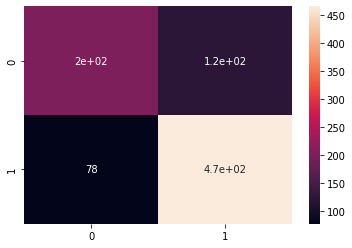

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

In [84]:
string = "Tesla self driving car crashes into a wall"
seq = np.array(sentence_to_vector([string], word_dict_train, max_length))
prob = model(seq)
prob

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.97701454, 0.02298549]], dtype=float32)>

In [85]:
save_dir = "saved_model"
model.save(save_dir, save_format="tf")
loaded = tf.keras.models.load_model(save_dir)
#print(list(loaded.signatures.keys()))
#infer = loaded.signatures["serving_default"]
#print(infer.structured_input_signature)
#print(infer.structured_outputs)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = 28
INPUT_SIZE = 28
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))

In [102]:
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter = tf.lite.TFLiteConverter.from_keras_model(model, signatures=concrete_func)
tflite_model = converter.convert()


NameError: name 'concrete_func' is not defined

In [103]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

20702036

In [106]:
expected = model.predict(test_sequences)

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]["index"], x_test[i:i+1, :, :])
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]["index"])
# Assert if the result of TFLite model is consistent with the TF model.
np.testing.assert_almost_equal(expected, result)

RuntimeError: tensorflow/lite/core/subgraph.cc BytesRequired number of elements overflowed.
Node number 3 (CONV_2D) failed to prepare.

In [107]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 20,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]